In [2]:
import pandas as pd
import numpy as np

In [3]:
data = np.loadtxt("train.data",dtype=np.float32)
y = data[:,-1]
N = data.shape[0]
pos_num = np.where(y==1)[0].shape[0]
rate = pos_num*1.0/N
rate

0.05753086419753087

In [4]:
np.random.shuffle(data)
N_t = int(N*0.8)
train = data[0:N_t]
train_pos_rate = np.where(train[:,-1]==1)[0].shape[0]*1.0/train.shape[0]
print("train number:",train.shape[0],"train pos rate:",train_pos_rate)
test = data[N_t:]
test_pos_rate = np.where(test[:,-1]==1)[0].shape[0]*1.0/test.shape[0]
print("test number:",test.shape[0],"test pos rate:",test_pos_rate)

# if abs(test_rate-rate)>0.01:
#     print("the test and all data has more that 0.01 difference about the distribution ")

train number: 6480 train pos rate: 0.0587962962962963
test number: 1620 test pos rate: 0.05246913580246913


In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
clf = RandomForestClassifier(random_state=0)
clf.fit(train[:,:-1],train[:,-1])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [7]:
y_ = clf.predict(test[:,:-1])
clf.score(test[:,:-1],test[:,-1])

0.9407407407407408

In [8]:
y = test[:,-1]
index=np.where(y==1)[0]
N_pos = index.shape[0]
N_pos_pre = np.where(y_[index]==1)[0].shape[0]
N_pos_pre*1.0/N_pos

0.047058823529411764

In [9]:
import imblearn 

Confusion matrix:
[[1111  424]
 [  32   53]]
              precision    recall  f1-score   support

        -1.0    0.97200   0.72378   0.82972      1535
         1.0    0.11111   0.62353   0.18861        85

    accuracy                        0.71852      1620
   macro avg    0.54156   0.67365   0.50917      1620
weighted avg    0.92683   0.71852   0.79609      1620

auc:0.7220540333397202


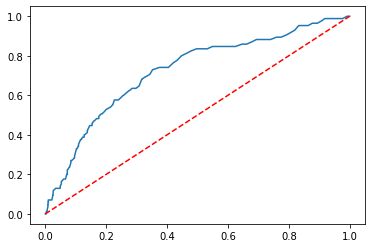

In [10]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, auc, roc_curve
import matplotlib.pyplot as plt


bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100,max_samples=0.5,replacement=False,random_state=0)
bbc.fit(train[:,:-1],train[:,-1])
y_pre = bbc.predict(test[:,:-1])
y = test[:,-1]

y_probas = bbc.predict_proba(test[:,:-1])
fpr, tpr, threshold = roc_curve(y, y_probas[:,1])
print('Confusion matrix:')
print(confusion_matrix(y,y_pre))
print(classification_report(y, y_pre, digits=5))
plt.plot(fpr, tpr)
plt.plot([0,1],'r--')
print('auc:{}'.format(auc(fpr, tpr)))


Confusion matrix:
[[1077  458]
 [  32   53]]
              precision    recall  f1-score   support

        -1.0    0.97115   0.70163   0.81467      1535
         1.0    0.10372   0.62353   0.17785        85

    accuracy                        0.69753      1620
   macro avg    0.53743   0.66258   0.49626      1620
weighted avg    0.92563   0.69753   0.78126      1620

auc:0.7144433799578463


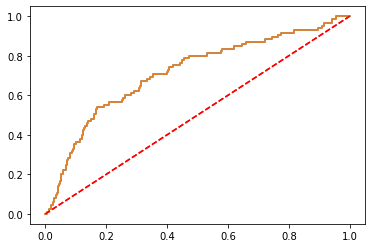

In [11]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

bbc = BalancedBaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3,weights='distance'),n_estimators=100,max_samples=0.5,replacement=False,random_state=0)
#bbc = KNeighborsClassifier(n_neighbors=3,weights='distance',p=2)
bbc.fit(train[:,:-1],train[:,-1])
y_pre = bbc.predict(test[:,:-1])
y = test[:,-1]

y_probas = bbc.predict_proba(test[:,:-1])
fpr, tpr, threshold = roc_curve(y, y_probas[:,1])
print('Confusion matrix:')
print(confusion_matrix(y,y_pre))
print(classification_report(y, y_pre, digits=5))
plt.plot(fpr, tpr)
plt.plot([0,1],'r--')
print('auc:{}'.format(auc(fpr, tpr)))
plt.plot(fpr, tpr)
plt.plot([0,1],'r--')


Confusion matrix:
[[1153  382]
 [  29   56]]
              precision    recall  f1-score   support

        -1.0    0.97547   0.75114   0.84873      1535
         1.0    0.12785   0.65882   0.21415        85

    accuracy                        0.74630      1620
   macro avg    0.55166   0.70498   0.53144      1620
weighted avg    0.93099   0.74630   0.81543      1620

auc:0.73030465606438


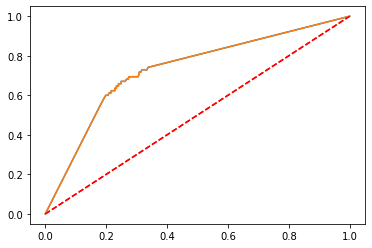

In [12]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix

bbc = BalancedBaggingClassifier(svm.SVC(kernel='linear',class_weight='balanced'),n_estimators=100,max_samples=0.5,replacement=False,random_state=0)
#bbc = svm.SVC(kernel='sigmoid',class_weight='balanced')
bbc.fit(train[:,:-1],train[:,-1])
y_pre = bbc.predict(test[:,:-1])
y = test[:,-1]


y_probas = bbc.predict_proba(test[:,:-1])
fpr, tpr, threshold = roc_curve(y, y_probas[:,1])
print('Confusion matrix:')
print(confusion_matrix(y,y_pre))
print(classification_report(y, y_pre, digits=5))
plt.plot(fpr, tpr)
plt.plot([0,1],'r--')
print('auc:{}'.format(auc(fpr, tpr)))
plt.plot(fpr, tpr)
plt.plot([0,1],'r--')

Confusion matrix:
[[1117  418]
 [  28   57]]
              precision    recall  f1-score   support

        -1.0    0.97555   0.72769   0.83358      1535
         1.0    0.12000   0.67059   0.20357        85

    accuracy                        0.72469      1620
   macro avg    0.54777   0.69914   0.51858      1620
weighted avg    0.93066   0.72469   0.80053      1620

auc:0.73030465606438


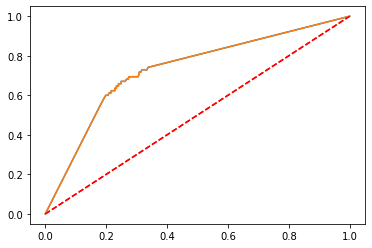

In [13]:
from sklearn.neural_network import MLPClassifier

clf=MLPClassifier(hidden_layer_sizes=(64,32,16), activation='tanh', solver='adam', alpha=0.05, batch_size=32)

clf = BalancedBaggingClassifier(clf,n_estimators=5,max_samples=0.5,replacement=False,random_state=0)
clf.fit(train[:,:-1],train[:,-1])
y_pre = clf.predict(test[:,:-1])
y = test[:,-1]

y_probas = bbc.predict_proba(test[:,:-1])
fpr, tpr, threshold = roc_curve(y, y_probas[:,1])
print('Confusion matrix:')
print(confusion_matrix(y,y_pre))
print(classification_report(y, y_pre, digits=5))
plt.plot(fpr, tpr)
plt.plot([0,1],'r--')
print('auc:{}'.format(auc(fpr, tpr)))
plt.plot(fpr, tpr)
plt.plot([0,1],'r--')

In [14]:
testset = np.loadtxt('sf_testset.data')

In [16]:
y_pred = clf.predict(testset)
np.savetxt('res2.txt', y_pred)

In [ ]:
plt.hist(y_pred, bins=2)

Confusion matrix:
[[1100  412]
 [  42   66]]
              precision    recall  f1-score   support

        -1.0    0.96322   0.72751   0.82894      1512
         1.0    0.13808   0.61111   0.22526       108

    accuracy                        0.71975      1620
   macro avg    0.55065   0.66931   0.52710      1620
weighted avg    0.90821   0.71975   0.78869      1620

auc:0.6702215608465609


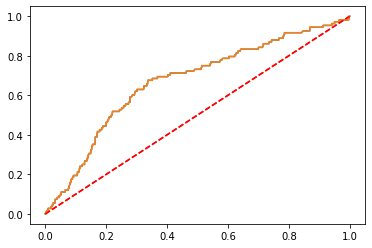

In [37]:
from xgboost import XGBClassifier

clf=XGBClassifier()

clf = BalancedBaggingClassifier(clf,n_estimators=5,max_samples=0.5,replacement=False,random_state=0)
clf.fit(train[:,:-1],train[:,-1])
y_pre = clf.predict(test[:,:-1])
y = test[:,-1]

y_probas = bbc.predict_proba(test[:,:-1])
fpr, tpr, threshold = roc_curve(y, y_probas[:,1])
print('Confusion matrix:')
print(confusion_matrix(y,y_pre))
print(classification_report(y, y_pre, digits=5))
plt.plot(fpr, tpr)
plt.plot([0,1],'r--')
print('auc:{}'.format(auc(fpr, tpr)))
plt.plot(fpr, tpr)
plt.plot([0,1],'r--')

In [42]:
#使用adaboost方法 
from sklearn.ensemble import AdaBoostClassifier

ratio = 6109/371
sample_weights = np.ones_like(train[:,-1], dtype=np.float)
sample_weights[train[:,-1]==-1]=1
sample_weights[train[:,-1]==1]=ratio

ada = AdaBoostClassifier(n_estimators=175)
# 此处使用加权
# ada.fit(X_trian, Y_train, sample_weight= sample_weights)
ada.fit(train[:,:-1],train[:,-1])
y_pred = ada.predict(test[:,:-1])

print('Confusion matrix:')
print(confusion_matrix(Y_val, y_pred))
print(classification_report(Y_val, y_pred, digits=5))

# auc
y_probas = ada.predict_proba(X_val)
fpr, tpr, thesholds = roc_curve(Y_val, y_probas[:,1])

plt.plot(fpr, tpr)
plt.plot([0,1], 'r--')

ada_auc=auc(fpr, tpr)
print('auc:{}'.format(ada_auc))
# 发现对少样本进行加权，会使得
# 少样本的召回率明显提高（0.99803-->0.6631），多样本的召回率会下降（0.0059-->0.7055)
# 少样本精度：0.5-->0.123； 多样本精度：0.943-->0.871
# auc也降低了：0.72619-->0.720
# 采用样本加权貌似没什么用，因为adaboost本身就会调节样本的权重

NameError: name 'Y_train' is not defined

In [41]:
# 使用xgboost
from xgboost import XGBClassifier

xgb_cls = XGBClassifier()
xgb_cls.fit(X_trian, Y_train) 
y_pred = xgb_cls.predict(X_val)

print('Confusion matrix:')
print(confusion_matrix(Y_val, y_pred))
print(classification_report(Y_val, y_pred, digits=5))

# auc
y_probas = xgb_cls.predict_proba(X_val)
fpr, tpr, thesholds = roc_curve(Y_val, y_probas[:,1])

plt.plot(fpr, tpr)
plt.plot([0,1], 'r--')

xgb_auc=auc(fpr, tpr)
print('auc:{}'.format(xgb_auc))

NameError: name 'X_trian' is not defined